### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda['Tiendas']='Tienda 1'
tienda2['Tiendas']='Tienda 2'
tienda3['Tiendas']='Tienda 3'
tienda4['Tiendas']='Tienda 4'

df_tiendas = pd.concat([tienda,tienda2,tienda3,tienda4])
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tiendas
584,Armario,Muebles,514300.0,27800.0,22/11/2021,Rafael Acosta,Medellín,1,Tarjeta de crédito,10,6.25184,-75.56359,Tienda 1
1416,Mesa de comedor,Muebles,308900.0,14600.0,09/11/2021,Izabela de León,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175,Tienda 1
736,Dashboards con Power BI,Libros,44600.0,0.0,08/06/2020,Juliana Costa,Cartagena,4,Cupón,1,10.39972,-75.51444,Tienda 1
850,Balón de voleibol,Deportes y diversión,59900.0,3900.0,30/01/2021,Mariana Herrera,Pereira,5,Tarjeta de crédito,3,4.81333,-75.69611,Tienda 2
2121,Dinosaurio Rex,Juguetes,16800.0,0.0,27/01/2020,Blanca Ramirez,Medellín,1,Cupón,1,6.25184,-75.56359,Tienda 4


#**1. Ingreso total por tienda**

* En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.



##**Calculo de ingresos y porcentajes de cada tienda**

In [3]:
ingresos_tiendas = df_tiendas.groupby('Tiendas')['Precio'].sum()
ingresos_formateados = ingresos_tiendas.map('${:,.2f}'.format)

porcentaje_tiendas = ingresos_tiendas / ingresos_tiendas.sum() * 100
porcentaje_formateado = porcentaje_tiendas.map('{:.2f}%'.format)

print(ingresos_formateados)
print(porcentaje_formateado)

Tiendas
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Precio, dtype: object
Tiendas
Tienda 1    26.13%
Tienda 2    25.35%
Tienda 3    24.93%
Tienda 4    23.58%
Name: Precio, dtype: object


##**Grafica de los ingresos y porcentajes**

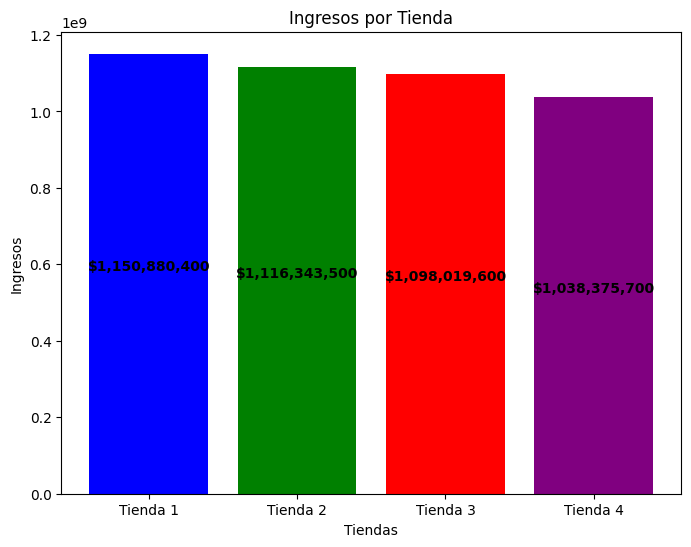

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

x = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y = ingresos_tiendas

colores = ['blue', 'green', 'red', 'purple']
bars = plt.bar(x, y, color=colores)

# 🔹 Agregar valores dentro de las barras
for bar in bars:
    altura = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width()/2,
        altura / 2,
        f'${altura:,.0f}',
        ha='center',
        va='bottom',
        color='black',
        fontweight='bold'
    )

plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por Tienda')

plt.show()


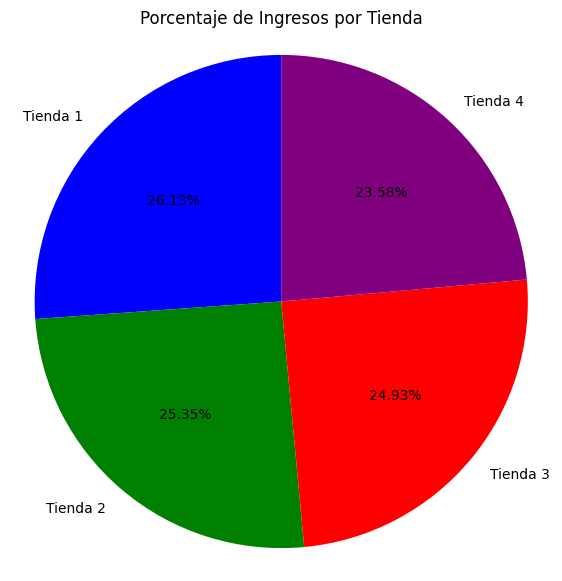

In [5]:
plt.figure(figsize=(7, 7))
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.pie(porcentaje_tiendas, labels=labels, autopct='%1.2f%%', startangle=90, colors=colores)
plt.axis('equal')
plt.title('Porcentaje de Ingresos por Tienda')
plt.show()

##**Analisis**

En este apartado se analizan los ingresos totales generados por cada tienda.
El objetivo es identificar cuál tienda aporta mayor volumen de ventas al negocio y cuál presenta el menor rendimiento económico.

A partir de los calculos y gráficos se observa que:

* La tienda con mayor porcentaje de ingresos es Tienda 1.

* La tienda con menor participación en los ingresos es Tienda 4, lo que puede indicar una menor demanda o menor volumen de ventas.

#**2. Ventas por categoría**
* En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

##**Cantidad de ventas registradas por categoria en cada tienda**

In [6]:
vpc_tiendas = df_tiendas.groupby(['Tiendas', 'Categoría del Producto'])['Precio'].size()\
              .reset_index(name='Cantidad Vendida')\
              .sort_values(by=['Tiendas', 'Cantidad Vendida'], ascending = [True, False])
print(vpc_tiendas)

     Tiendas   Categoría del Producto  Cantidad Vendida
7   Tienda 1                  Muebles               465
3   Tienda 1             Electrónicos               448
5   Tienda 1                 Juguetes               324
2   Tienda 1        Electrodomésticos               312
1   Tienda 1     Deportes y diversión               284
4   Tienda 1   Instrumentos musicales               182
6   Tienda 1                   Libros               173
0   Tienda 1  Artículos para el hogar               171
15  Tienda 2                  Muebles               442
11  Tienda 2             Electrónicos               422
13  Tienda 2                 Juguetes               313
10  Tienda 2        Electrodomésticos               305
9   Tienda 2     Deportes y diversión               275
12  Tienda 2   Instrumentos musicales               224
14  Tienda 2                   Libros               197
8   Tienda 2  Artículos para el hogar               181
23  Tienda 3                  Muebles           

##**Categoria mas popular en cada tienda**

In [7]:
cmp_tiendas = vpc_tiendas.loc[vpc_tiendas.groupby('Tiendas')['Cantidad Vendida'].idxmax()]
print(cmp_tiendas)

     Tiendas Categoría del Producto  Cantidad Vendida
7   Tienda 1                Muebles               465
15  Tienda 2                Muebles               442
23  Tienda 3                Muebles               499
31  Tienda 4                Muebles               480


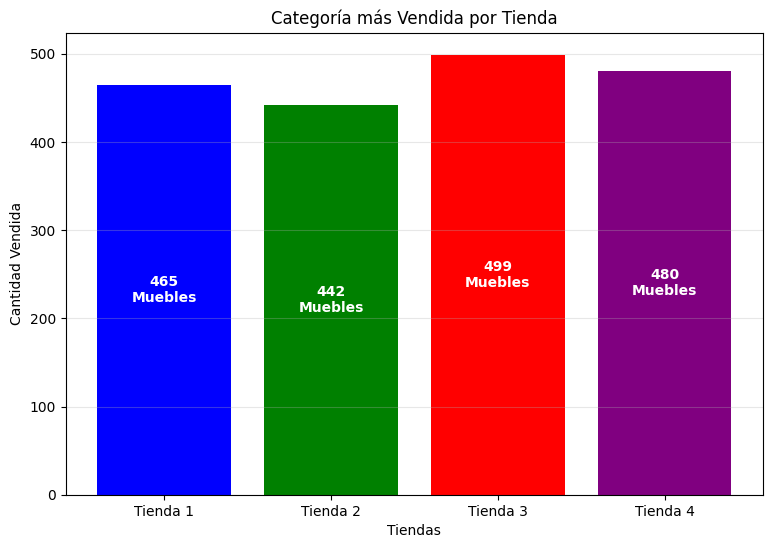

In [8]:
plt.figure(figsize=(9, 6))

bars = plt.bar(
    cmp_tiendas['Tiendas'],
    cmp_tiendas['Cantidad Vendida'],
    color=colores
)

for bar, cantidad, categoria in zip(
    bars,
    cmp_tiendas['Cantidad Vendida'],
    cmp_tiendas['Categoría del Producto']
):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{cantidad}\n{categoria}",
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel('Tiendas')
plt.ylabel('Cantidad Vendida')
plt.title('Categoría más Vendida por Tienda')
plt.grid(axis='y', alpha=0.3)

plt.show()


##**Analisis**

Los resultados muestran que en las cuatro tiendas la categoría con mayor volumen de ventas es Muebles, lo que indica una alta demanda constante de este tipo de productos en todas las ubicaciones.

Se observa que:

* Tienda 3 lidera las ventas de muebles, lo que sugiere un mejor desempeño comercial en esta categoría.

* Tienda 2 presenta la menor cantidad de ventas dentro de la categoría, lo que podría indicar una menor demanda local o menor efectividad en promociones.

* Las diferencias entre tiendas no son extremadamente grandes, lo que demuestra un comportamiento de consumo relativamente homogéneo.

* Este análisis permite concluir que la categoría Muebles es un pilar fundamental para las ventas del negocio y debe ser priorizada en estrategias de inventario, abastecimiento y campañas comerciales.

#**3. Valoracion media por tienda**
* En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.


In [9]:
vmp_tiendas = df_tiendas.groupby('Tiendas')['Calificación'].mean().round(2).reset_index()
print(vmp_tiendas)

    Tiendas  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


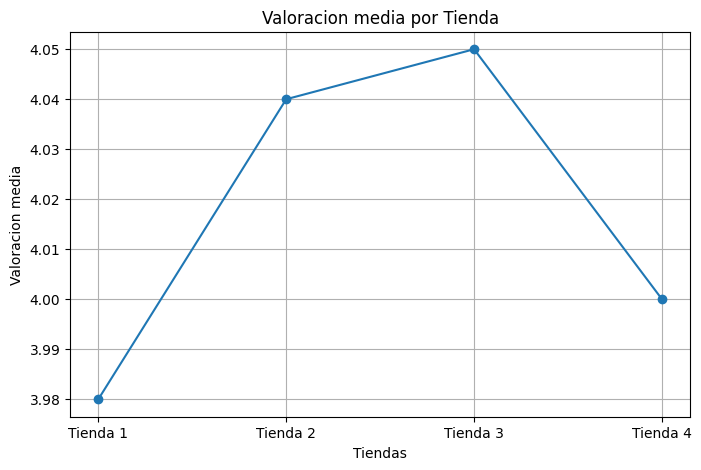

In [10]:
plt.figure(figsize=(8, 5))

plt.plot(vmp_tiendas['Tiendas'], vmp_tiendas['Calificación'], marker='o')

plt.xlabel('Tiendas')
plt.ylabel('Valoracion media')
plt.title('Valoracion media por Tienda')

plt.grid(True)
plt.show()


##**Analisis**

Se observa que todas las tiendas presentan una calificación cercana a 4 puntos, lo que indica un nivel de satisfacción general positivo por parte de los clientes. La Tienda 3 registra la calificación más alta 4.05, lo que sugiere una ligera ventaja en la percepción de calidad o servicio. Muy cerca se encuentra la Tienda 2 con 4.04, manteniendo también una evaluación favorable.

Por su parte, la Tienda 4 obtiene una calificación de 4.00, ubicándose en una posición intermedia, mientras que la Tienda 1 presenta la calificación más baja con 3.98. Aunque esta diferencia es mínima, indica una leve oportunidad de mejora en la experiencia del cliente.

#**4. Productos más y menos vendidos**
* En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

##**Ventas registradas por producto en cada tienda**

In [11]:
vpt_productos = df_tiendas.groupby(['Tiendas', 'Producto'])['Precio'].size()\
              .reset_index(name='Cantidad Vendida')\
              .sort_values(by=['Tiendas', 'Cantidad Vendida'], ascending = [True, False])

print(vpt_productos)

      Tiendas                 Producto  Cantidad Vendida
1    Tienda 1                  Armario                60
33   Tienda 1               Microondas                60
48   Tienda 1            TV LED UHD 4K                60
40   Tienda 1         Secadora de ropa                58
9    Tienda 1  Bloques de construcción                56
..        ...                      ...               ...
181  Tienda 4         Lavadora de ropa                38
192  Tienda 4             Refrigerador                38
174  Tienda 4        Guitarra acústica                37
154  Tienda 4                  Armario                34
175  Tienda 4       Guitarra eléctrica                33

[204 rows x 3 columns]


##**Productos mas vendidos**

In [12]:
pmv_tiendas = vpt_productos.loc[vpt_productos.groupby('Tiendas')['Cantidad Vendida'].idxmax()]
print(pmv_tiendas)

      Tiendas                   Producto  Cantidad Vendida
1    Tienda 1                    Armario                60
75   Tienda 2  Iniciando en programación                65
129  Tienda 3              Kit de bancas                57
163  Tienda 4                   Cama box                62


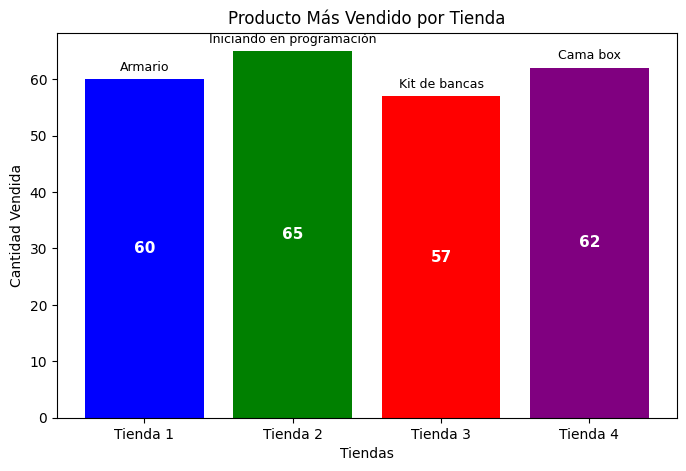

In [13]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    pmv_tiendas['Tiendas'],
    pmv_tiendas['Cantidad Vendida'],
    color=colores
)

for bar, producto, color in zip(bars, pmv_tiendas['Producto'], colores):

    altura = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width()/2,
        altura / 2,
        f'{int(altura)}',
        ha='center',
        va='center',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

    plt.text(
        bar.get_x() + bar.get_width()/2,
        altura + 1,
        producto,
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.xlabel('Tiendas')
plt.ylabel('Cantidad Vendida')
plt.title('Producto Más Vendido por Tienda')

plt.show()



##**Producto menos vendidos**

In [14]:
pmenv_tiendas = vpt_productos.loc[vpt_productos.groupby('Tiendas')['Cantidad Vendida'].idxmin()]
print(pmenv_tiendas)

      Tiendas                   Producto  Cantidad Vendida
4    Tienda 1  Auriculares con micrófono                33
77   Tienda 2              Juego de mesa                32
111  Tienda 3    Bloques de construcción                35
175  Tienda 4         Guitarra eléctrica                33


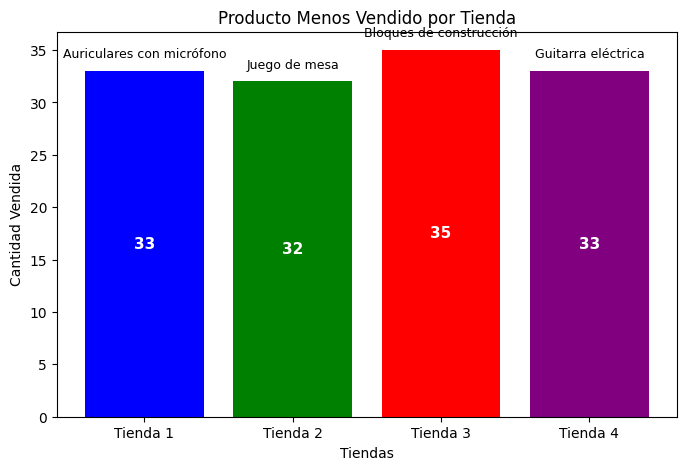

In [15]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    pmenv_tiendas['Tiendas'],
    pmenv_tiendas['Cantidad Vendida'],
    color=colores
)

for bar, producto, color in zip(bars, pmenv_tiendas['Producto'], colores):

    altura = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width()/2,
        altura / 2,
        f'{int(altura)}',
        ha='center',
        va='center',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

    plt.text(
        bar.get_x() + bar.get_width()/2,
        altura + 1,
        producto,
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.xlabel('Tiendas')
plt.ylabel('Cantidad Vendida')
plt.title('Producto Menos Vendido por Tienda')

plt.show()

##**Resumen**

In [16]:
mas = pmv_tiendas.rename(columns={'Producto' : 'Producto mas vendido'})
menos = pmenv_tiendas.rename(columns={'Producto': 'Producto menos vendido'})

tabla_resumen = mas.merge(menos, on='Tiendas', how='inner', suffixes=('_mas_vendido', '_menos_vendido'))
tabla_resumen

,Tiendas,Producto mas vendido,Cantidad Vendida_mas_vendido,Producto menos vendido,Cantidad Vendida_menos_vendido
0,Tienda 1,Armario,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


Existe una diferencia clara entre los productos de mayor rotación y los de menor rotación dentro de cada tienda, lo cual permite identificar:

* Qué productos deben reforzarse en stock.

* Cuáles podrían ser candidatos a promociones o reducción de inventario.

* Este análisis también evidencia que cada tienda tiene un comportamiento de consumo distinto, lo que sugiere que las estrategias comerciales deberían adaptarse por ubicación.

#**5. Valor del envío promedio por tienda**
* En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

##**Calculo y grafica del valor del envio promedio por tienda**

In [17]:
vep_tiendas = df_tiendas.groupby('Tiendas')['Costo de envío'].mean().round(2).reset_index()
print(vep_tiendas)


    Tiendas  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


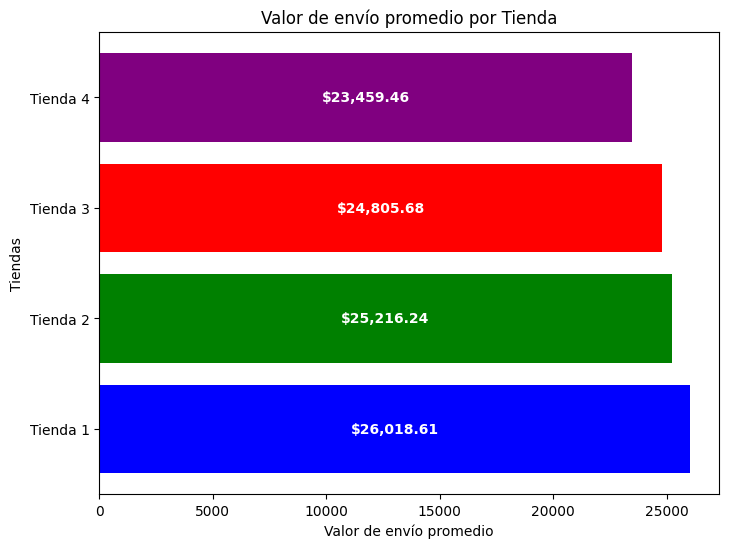

In [18]:
plt.figure(figsize=(8, 6))

x = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y = vep_tiendas['Costo de envío']

colores = ['blue', 'green', 'red', 'purple']
bars = plt.barh(x, y, color=colores)

# 🔹 Agregar números dentro de las barras
for bar in bars:
    ancho = bar.get_width()

    plt.text(
        ancho / 2,
        bar.get_y() + bar.get_height()/2,
        f'${ancho:,.2f}',
        va='center',
        ha='center',
        color='white',
        fontweight='bold'
    )

plt.xlabel('Valor de envío promedio')
plt.ylabel('Tiendas')
plt.title('Valor de envío promedio por Tienda')

plt.show()


##**Interpretacion**

La Tienda 4 destaca por tener el costo de envío promedio más bajo, lo que puede representar una ventaja comercial. En contraste, la Tienda 1 presenta el mayor costo, lo que podría ser un factor a revisar para mejorar su competitividad. Este indicador permite identificar oportunidades para optimizar rutas logísticas, negociar tarifas de transporte o implementar promociones de envío.

#**6. Extra Analisis del desempeño geografico**
* En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

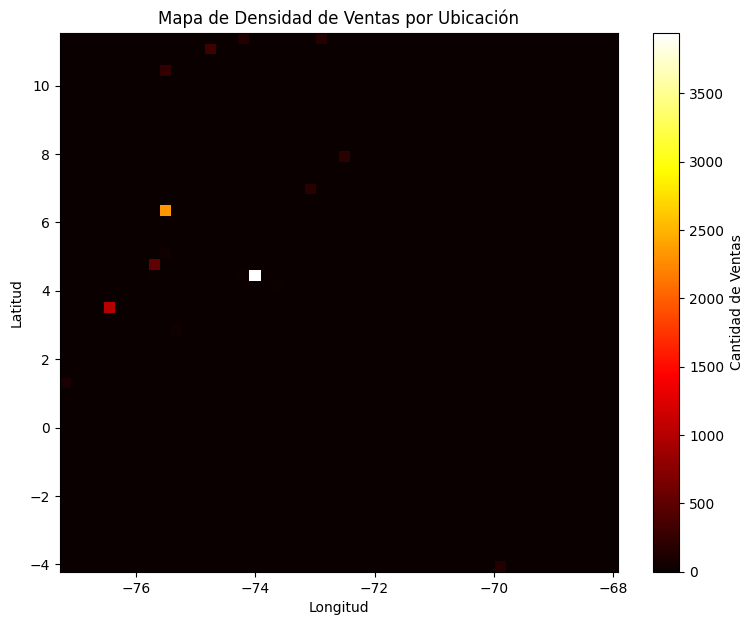

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

ax = plt.gca()
ax.set_facecolor('white')

# Mapa de densidad
plt.hist2d(
    df_tiendas['lon'],
    df_tiendas['lat'],
    bins=50,
    cmap='hot'
)

# Barra de color
cbar = plt.colorbar()
cbar.set_label('Cantidad de Ventas')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Densidad de Ventas por Ubicación')


plt.show()



#**7. Toma de decisión**

##**Comparacion entre el porcentaje de ventas y la valoracion promedio por tienda**

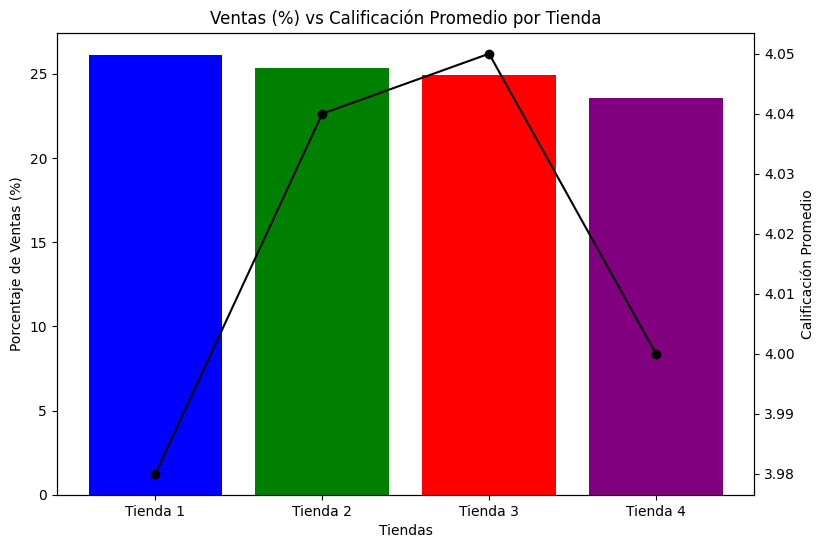

In [20]:
fig, ax1 = plt.subplots(figsize=(9,6))

# Barras → Porcentaje de ventas
ax1.bar(
    porcentaje_tiendas.index,
    porcentaje_tiendas.values,
    color=colores
)
ax1.set_xlabel('Tiendas')
ax1.set_ylabel('Porcentaje de Ventas (%)')

# Segundo eje → Calificación
ax2 = ax1.twinx()
ax2.plot(
    vmp_tiendas['Tiendas'],
    vmp_tiendas['Calificación'],
    marker='o',
    color='black'
)
ax2.set_ylabel('Calificación Promedio')

plt.title('Ventas (%) vs Calificación Promedio por Tienda')
plt.show()



##**Conclusión y Recomendación**

Con base en el análisis del porcentaje de ventas y la calificación promedio por tienda, se observa que la Tienda 4 presenta el menor aporte en ventas y una calificación inferior en comparación con las Tiendas 2 y 3. Aunque la Tienda 1 posee la calificación promedio más baja, su alto volumen de ventas la convierte en una unidad estratégica para el negocio.

Por lo tanto, considerando el bajo desempeño comercial y una calificación que no compensa este resultado, se recomienda que la Tienda 4 sea la candidata para cierre o reestructuración.